Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Importing the dataset from kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/'

In [ ]:
!kaggle datasets download -d yasserhessein/thyroid-disease-data-set

  0% 0.00/48.8k [00:00<?, ?B/s]
100% 48.8k/48.8k [00:00<00:00, 56.1MB/s]


In [ ]:
!unzip \*.zip && 6rm *.zip

Archive:  thyroid-disease-data-set.zip
  inflating: hypothyroid.csv         


In [ ]:
thyroid_df = pd.read_csv('/content/hypothyroid.csv')
thyroid_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


Data Cleaning

In [ ]:
thyroid_df.rename(columns={'binaryClass':'Label'},inplace=True)

In [ ]:
thyroid_df.replace('?',np.nan,inplace=True)

In [ ]:
thyroid_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Label
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,NaN,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,NaN,f,NaN,f,NaN,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,NaN,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,NaN,f,NaN,f,NaN,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,NaN,SVI,P


In [ ]:
thyroid_df.drop(['T3 measured','TSH measured','TT4 measured','T4U measured','FTI measured','TBG measured','TBG','referral source','on thyroxine','query on thyroxine','on antithyroid medication','query hypothyroid', 'query hyperthyroid','hypopituitary', 'psych'],axis=1,inplace=True)

In [ ]:
thyroid_df.head()

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Label
0,41,F,f,f,f,f,f,f,f,1.3,2.5,125,1.14,109,P
1,23,F,f,f,f,f,f,f,f,4.1,2,102,NaN,NaN,P
2,46,M,f,f,f,f,f,f,f,0.98,NaN,109,0.91,120,P
3,70,F,f,f,f,f,f,f,f,0.16,1.9,175,NaN,NaN,P
4,70,F,f,f,f,f,f,f,f,0.72,1.2,61,0.87,70,P


In [ ]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3771 non-null   object
 1   sex              3622 non-null   object
 2   sick             3772 non-null   object
 3   pregnant         3772 non-null   object
 4   thyroid surgery  3772 non-null   object
 5   I131 treatment   3772 non-null   object
 6   lithium          3772 non-null   object
 7   goitre           3772 non-null   object
 8   tumor            3772 non-null   object
 9   TSH              3403 non-null   object
 10  T3               3003 non-null   object
 11  TT4              3541 non-null   object
 12  T4U              3385 non-null   object
 13  FTI              3387 non-null   object
 14  Label            3772 non-null   object
dtypes: object(15)
memory usage: 442.2+ KB


In [ ]:
thyroid_df['thyroid surgery'].value_counts()

f    3719
t      53
Name: thyroid surgery, dtype: int64

In [ ]:
cols = ['age','FTI','TSH','T3','TT4','T4U']
for i in cols:
    thyroid_df[i] = pd.to_numeric(thyroid_df[i])

In [ ]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3771 non-null   float64
 1   sex              3622 non-null   object 
 2   sick             3772 non-null   object 
 3   pregnant         3772 non-null   object 
 4   thyroid surgery  3772 non-null   object 
 5   I131 treatment   3772 non-null   object 
 6   lithium          3772 non-null   object 
 7   goitre           3772 non-null   object 
 8   tumor            3772 non-null   object 
 9   TSH              3403 non-null   float64
 10  T3               3003 non-null   float64
 11  TT4              3541 non-null   float64
 12  T4U              3385 non-null   float64
 13  FTI              3387 non-null   float64
 14  Label            3772 non-null   object 
dtypes: float64(6), object(9)
memory usage: 442.2+ KB


Handle Missing Values

In [ ]:
thyroid_df.isnull().sum()

age                  1
sex                150
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                369
T3                 769
TT4                231
T4U                387
FTI                385
Label                0
dtype: int64

In [ ]:
miss_cols = ['FTI','TSH','T3','TT4','T4U']
for i in miss_cols:
    thyroid_df[i] = thyroid_df[i].fillna(thyroid_df[i].mean())

In [ ]:
thyroid_df.dropna(inplace=True)

In [ ]:
thyroid_df.isnull().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
I131 treatment     0
lithium            0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Label              0
dtype: int64

In [ ]:
thyroid_df = thyroid_df.drop(1364)

In [ ]:
thyroid_df.head()

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Label
0,41.0,F,f,f,f,f,f,f,f,1.30,2.5000,125.0,1.140,109.000000,P
1,23.0,F,f,f,f,f,f,f,f,4.10,2.0000,102.0,0.995,110.469649,P
2,46.0,M,f,f,f,f,f,f,f,0.98,2.0135,109.0,0.910,120.000000,P
3,70.0,F,f,f,f,f,f,f,f,0.16,1.9000,175.0,0.995,110.469649,P
4,70.0,F,f,f,f,f,f,f,f,0.72,1.2000,61.0,0.870,70.000000,P


In [ ]:
thyroid_df.TT4 = thyroid_df.TT4.astype(int)
thyroid_df.FTI = thyroid_df.FTI.astype(int)
thyroid_df.age = thyroid_df.age.astype(int)

EDA

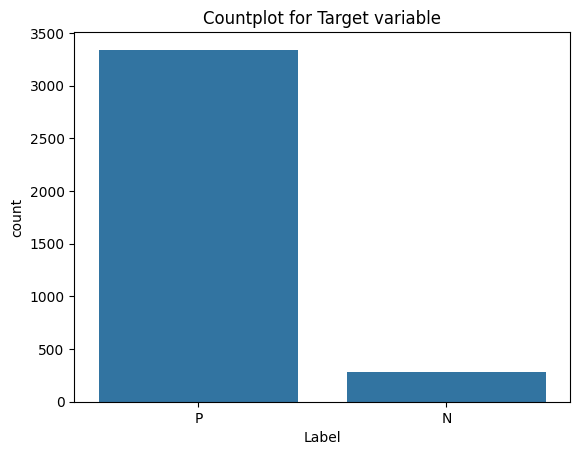

In [ ]:
sns.countplot(x='Label',data=thyroid_df)
plt.title("Countplot for Target variable");

In [ ]:
positive_df = thyroid_df[thyroid_df.Label=='P']

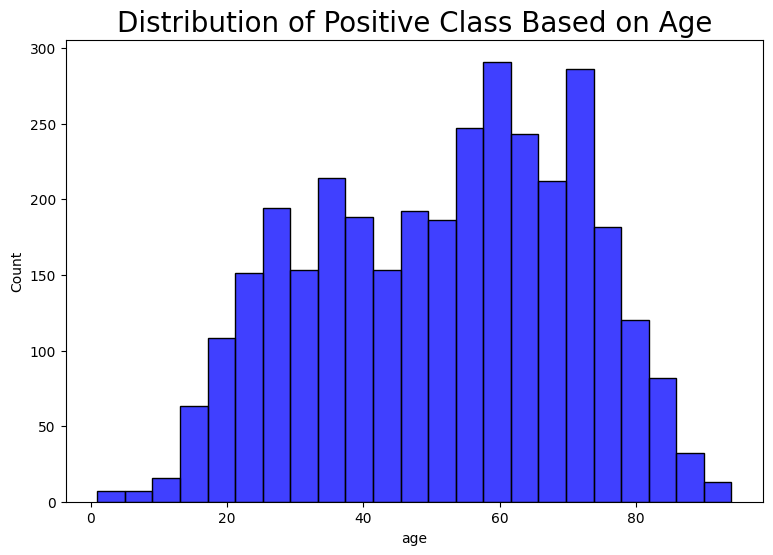

In [ ]:
plt.figure(figsize=(9,6))
sns.histplot(x='age',data=positive_df,color='blue')
plt.title("Distribution of Positive Class Based on Age",{'fontsize':20});

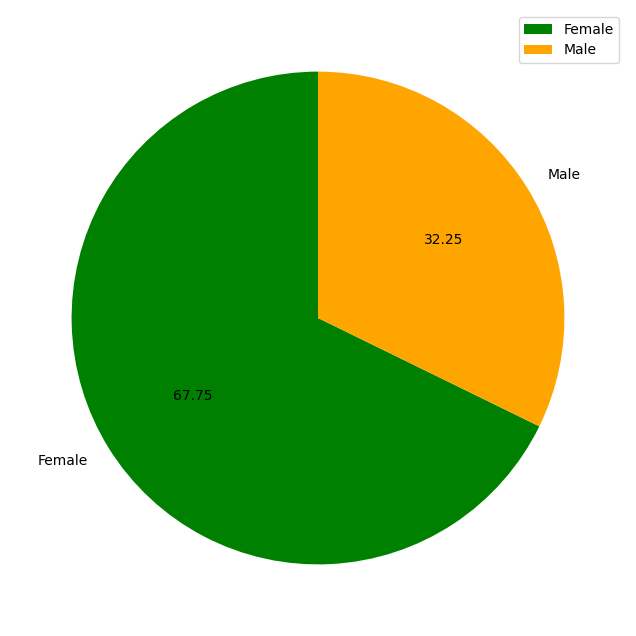

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(x=positive_df.sex.value_counts(),
        labels=['Female','Male'],
        startangle = 90,
        colors=['green','orange'],
        autopct='%.2f'
       );
plt.legend();

Inference : Female patients who has disease is greater than male patients

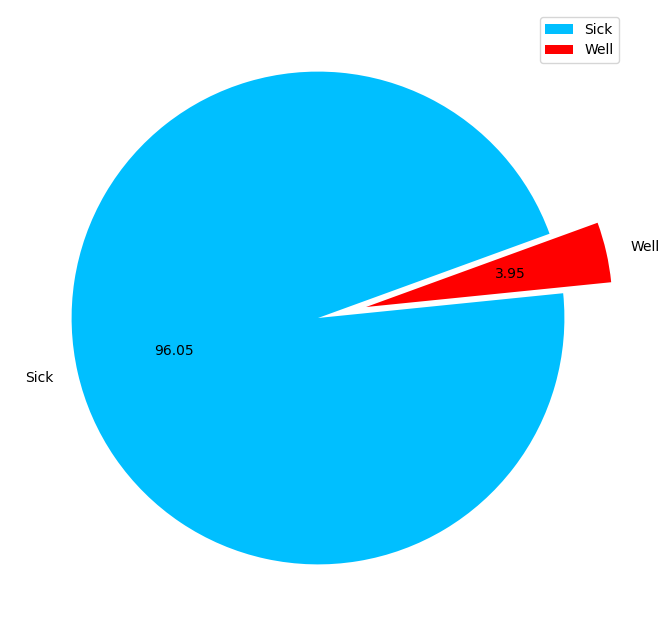

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(x=positive_df.sick.value_counts(),
        labels=['Sick','Well'],
        startangle = 20,
        colors=['deepskyblue','red'],
        autopct='%.2f',
        explode=[0,0.2]
       );
plt.legend();